In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reuniões
Essa base contem informações já classificadas das reuniões: parlamentar que participou e lobistas que participaram, bem como dados dos lobistas como área de atuação, budget, etc.

As colunas com "l" no começo vem da declarçaão dos lobistas dos temas de interesse. 
- Ver 2.1_treatment_meetings_orgs.ipynb

In [2]:
df = pd.read_csv("./data/silver/df_meetings_lobbyists.csv")

In [3]:
df

,member_id,meeting_date,member_capacity,lobbyist_id,l_category,l_head_office_country,l_agriculture,l_economics_and_trade,l_education,l_environment_and_climate,l_foreign_and_security_affairs,l_health,l_human_rights,l_infrastructure_and_industry,l_technology,l_ln_max_budget,l_days_since_registration
0,person/197502,2019-07-25,Member,064616126640-05,Business,FRANCE,0,1,0,1,1,1,0,1,0,13.710150,841
1,person/197581,2019-09-17,Rapporteur,064616126640-05,Business,FRANCE,0,1,0,1,1,1,0,1,0,13.710150,895
2,person/197529,2019-09-17,Member,064616126640-05,Business,FRANCE,0,1,0,1,1,1,0,1,0,13.710150,895
3,person/197589,2019-12-17,Member,064616126640-05,Business,FRANCE,0,1,0,1,1,1,0,1,0,13.710150,986
4,person/197589,2019-12-17,Member,064616126640-05,Business,FRANCE,0,1,0,1,1,1,0,1,0,13.710150,986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40338,person/208722,2024-09-09,Member,52836621780-65,Other,BELGIUM,1,1,1,1,1,1,1,1,1,13.815512,5582
40339,person/119435,2024-09-06,Member,840952236814-41,Other,CROATIA,1,1,1,1,0,1,0,1,1,9.210340,1726
40340,person/256987,2024-09-04,Member,999325050767-97,Other,COSTA RICA,1,0,1,1,1,0,0,0,1,17.341871,415
40341,person/197719,2024-09-04,Member,999325050767-97,Other,COSTA RICA,1,0,1,1,1,0,0,0,1,17.341871,415


In [4]:
df[df["member_id"] == "person/197502"].sort_values("meeting_date").head()

,member_id,meeting_date,member_capacity,lobbyist_id,l_category,l_head_office_country,l_agriculture,l_economics_and_trade,l_education,l_environment_and_climate,l_foreign_and_security_affairs,l_health,l_human_rights,l_infrastructure_and_industry,l_technology,l_ln_max_budget,l_days_since_registration
2002,person/197502,2019-07-17,Member,9624415524-28,Business,BELGIUM,0,1,0,1,1,0,0,1,1,13.304685,3925
297,person/197502,2019-07-24,Member,790573922716-64,Business,BELGIUM,0,1,0,1,1,1,0,1,0,12.206073,1101
0,person/197502,2019-07-25,Member,064616126640-05,Business,FRANCE,0,1,0,1,1,1,0,1,0,13.710150,841
6459,person/197502,2019-09-17,Member,43284012043-03,Business,FRANCE,0,1,0,1,1,0,0,1,1,12.899220,3708
8418,person/197502,2019-09-18,Member,393423121496-65,Business,UNITED STATES,0,1,1,1,1,1,0,1,1,13.592367,1244


In [5]:
columns_cat = [
    "member_capacity",
    "l_category",
    "l_head_office_country",
]

df_dummies = pd.get_dummies(df, columns=columns_cat, dtype=int)

df_dummies.drop('lobbyist_id', axis=1,inplace=True)


In [6]:
df_dummies.describe().T

C:\Users\caca_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
l_agriculture,40343.0,0.403713,0.490647,0.0,0.0,0.0,1.0,1.0
l_economics_and_trade,40343.0,0.865801,0.340870,0.0,1.0,1.0,1.0,1.0
l_education,40343.0,0.465409,0.498808,0.0,0.0,0.0,1.0,1.0
l_environment_and_climate,40343.0,0.797858,0.401602,0.0,1.0,1.0,1.0,1.0
l_foreign_and_security_affairs,40343.0,0.698386,0.458964,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
l_head_office_country_UKRAINE,40343.0,0.000768,0.027710,0.0,0.0,0.0,0.0,1.0
l_head_office_country_UNITED ARAB EMIRATES,40343.0,0.000025,0.004979,0.0,0.0,0.0,0.0,1.0
l_head_office_country_UNITED KINGDOM,40343.0,0.048534,0.214894,0.0,0.0,0.0,0.0,1.0
l_head_office_country_UNITED STATES,40343.0,0.077684,0.267677,0.0,0.0,0.0,0.0,1.0


In [7]:
df_dummies

,member_id,meeting_date,l_agriculture,l_economics_and_trade,l_education,l_environment_and_climate,l_foreign_and_security_affairs,l_health,l_human_rights,l_infrastructure_and_industry,...,l_head_office_country_SWITZERLAND,l_head_office_country_TAIWAN,l_head_office_country_THAILAND,l_head_office_country_TOGO,l_head_office_country_TURKEY,l_head_office_country_UKRAINE,l_head_office_country_UNITED ARAB EMIRATES,l_head_office_country_UNITED KINGDOM,l_head_office_country_UNITED STATES,l_head_office_country_VIETNAM
0,person/197502,2019-07-25,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,person/197581,2019-09-17,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,person/197529,2019-09-17,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,person/197589,2019-12-17,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,person/197589,2019-12-17,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40338,person/208722,2024-09-09,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
40339,person/119435,2024-09-06,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
40340,person/256987,2024-09-04,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40341,person/197719,2024-09-04,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
pd.set_option("display.max_rows", 100)
df_descriptives = df_dummies.describe().T.sort_index()
df_descriptives

C:\Users\caca_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
l_agriculture,40343.0,0.403713,0.490647,0.0,0.000000,0.000000,1.000000,1.000000
l_category_Business,40343.0,0.555908,0.496871,0.0,0.000000,1.000000,1.000000,1.000000
l_category_NGOs,40343.0,0.271819,0.444903,0.0,0.000000,0.000000,1.000000,1.000000
l_category_Other,40343.0,0.172273,0.377622,0.0,0.000000,0.000000,0.000000,1.000000
l_days_since_registration,40343.0,3107.581960,1818.637028,-1551.0,1599.500000,3477.000000,4642.500000,5948.000000
l_economics_and_trade,40343.0,0.865801,0.340870,0.0,1.000000,1.000000,1.000000,1.000000
l_education,40343.0,0.465409,0.498808,0.0,0.000000,0.000000,1.000000,1.000000
l_environment_and_climate,40343.0,0.797858,0.401602,0.0,1.000000,1.000000,1.000000,1.000000
l_foreign_and_security_affairs,40343.0,0.698386,0.458964,0.0,0.000000,1.000000,1.000000,1.000000
l_head_office_country_AUSTRALIA,40343.0,0.000793,0.028153,0.0,0.000000,0.000000,0.000000,1.000000


# Criar colunas categóricas para variáveis contínuas

In [9]:
quant_vars = df_descriptives[df_descriptives['max'] != 1].index.tolist()
categoric_vars = df_descriptives[df_descriptives['max'] == 1].index.tolist()

quant_vars

['l_days_since_registration', 'l_ln_max_budget']

## l_max_budget
3 categorias com base na distribuição do ln_max_budget:

- até 1 quartil: lower
- do 2 ao 3 quartil: middle
- 4 quartil: upper


<Axes: xlabel='l_ln_max_budget'>

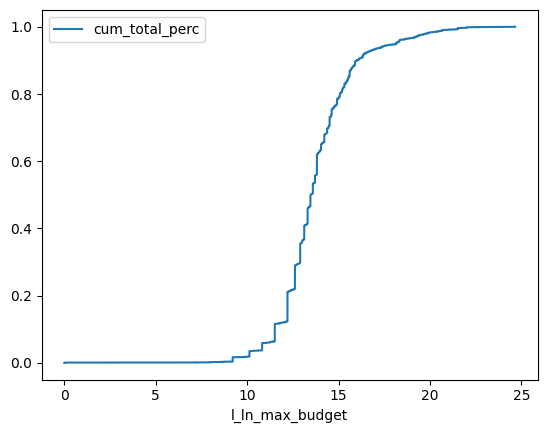

In [10]:
df_mb = df.copy()[['l_ln_max_budget']]

# replace -inf as 0
df_mb["l_ln_max_budget"] = df_mb["l_ln_max_budget"].replace(-np.inf, 0)

df_mb.sort_values("l_ln_max_budget", ascending=True, inplace=True)
df_mb["cum_total"] = (df_mb["l_ln_max_budget"] + 1).cumsum()
df_mb["cum_total_perc"] = df_mb["cum_total"] / df_mb["cum_total"].max()

df_mb.plot(kind="line", x="l_ln_max_budget", y="cum_total_perc")

In [11]:
df_budget_descriptives = df_mb.describe().T.sort_index()
df_budget_descriptives

,count,mean,std,min,25%,50%,75%,max
cum_total,40343.0,267654.492006,167769.069816,1.000000,120276.737461,260313.410381,409650.941073,581340.622762
cum_total_perc,40343.0,0.460409,0.288590,0.000002,0.206895,0.447781,0.704666,1.000000
l_ln_max_budget,40343.0,13.409950,2.335215,0.000000,12.206073,13.304685,14.465258,24.658174


In [12]:
df_dummies["l_budget_cat_lower"] = (df_dummies["l_ln_max_budget"] < df_dummies["l_ln_max_budget"].quantile(0.25)).astype(int)

df_dummies["l_budget_cat_middle"] = (
    (df_dummies["l_ln_max_budget"] >= df_dummies["l_ln_max_budget"].quantile(0.25)) &
    (df_dummies["l_ln_max_budget"] < df_dummies["l_ln_max_budget"].quantile(0.75))
).astype(int)

df_dummies["l_budget_cat_upper"] = (df_dummies["l_ln_max_budget"] >= df_dummies["l_ln_max_budget"].quantile(0.75)).astype(int)

df_dummies.drop(columns=["l_ln_max_budget"], inplace=True)

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40343 entries, 0 to 40342
Data columns (total 95 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   member_id                                             40343 non-null  object
 1   meeting_date                                          40343 non-null  object
 2   l_agriculture                                         40343 non-null  int64 
 3   l_economics_and_trade                                 40343 non-null  int64 
 4   l_education                                           40343 non-null  int64 
 5   l_environment_and_climate                             40343 non-null  int64 
 6   l_foreign_and_security_affairs                        40343 non-null  int64 
 7   l_health                                              40343 non-null  int64 
 8   l_human_rights                                        40343 non-nu

In [13]:
df_dummies.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
l_agriculture,40343.0,0.403713,0.490647,0.0,0.0,0.0,1.0,1.0
l_budget_cat_lower,40343.0,0.158615,0.365321,0.0,0.0,0.0,0.0,1.0
l_budget_cat_middle,40343.0,0.590115,0.491818,0.0,0.0,1.0,1.0,1.0
l_budget_cat_upper,40343.0,0.251270,0.433749,0.0,0.0,0.0,1.0,1.0
l_category_Business,40343.0,0.555908,0.496871,0.0,0.0,1.0,1.0,1.0
l_category_NGOs,40343.0,0.271819,0.444903,0.0,0.0,0.0,1.0,1.0
l_category_Other,40343.0,0.172273,0.377622,0.0,0.0,0.0,0.0,1.0
l_days_since_registration,40343.0,3107.581960,1818.637028,-1551.0,1599.5,3477.0,4642.5,5948.0
l_economics_and_trade,40343.0,0.865801,0.340870,0.0,1.0,1.0,1.0,1.0
l_education,40343.0,0.465409,0.498808,0.0,0.0,0.0,1.0,1.0


# days_since registration 

mesma ideia por quartil

In [14]:
df_dummies["l_days_since_registration_lower"] = (
    df_dummies["l_days_since_registration"]
    < df_dummies["l_days_since_registration"].quantile(0.25)
).astype(int)

df_dummies["l_days_since_registration_middle"] = (
    (df_dummies["l_days_since_registration"] >= df_dummies["l_days_since_registration"].quantile(0.25))
    & (df_dummies["l_days_since_registration"] < df_dummies["l_days_since_registration"].quantile(0.75))
).astype(int)

df_dummies["l_days_since_registration_upper"] = (
    df_dummies["l_days_since_registration"]
    >= df_dummies["l_days_since_registration"].quantile(0.75)
).astype(int)

df_dummies.drop(columns=["l_days_since_registration"], inplace=True)

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40343 entries, 0 to 40342
Data columns (total 97 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   member_id                                             40343 non-null  object
 1   meeting_date                                          40343 non-null  object
 2   l_agriculture                                         40343 non-null  int64 
 3   l_economics_and_trade                                 40343 non-null  int64 
 4   l_education                                           40343 non-null  int64 
 5   l_environment_and_climate                             40343 non-null  int64 
 6   l_foreign_and_security_affairs                        40343 non-null  int64 
 7   l_health                                              40343 non-null  int64 
 8   l_human_rights                                        40343 non-nu

# Final df

como todas as variáveis agora são categóricas, a agregação temporal será feita com soma

In [15]:
df_dummies.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
l_agriculture,40343.0,0.403713,0.490647,0.0,0.0,0.0,1.0,1.0
l_budget_cat_lower,40343.0,0.158615,0.365321,0.0,0.0,0.0,0.0,1.0
l_budget_cat_middle,40343.0,0.590115,0.491818,0.0,0.0,1.0,1.0,1.0
l_budget_cat_upper,40343.0,0.251270,0.433749,0.0,0.0,0.0,1.0,1.0
l_category_Business,40343.0,0.555908,0.496871,0.0,0.0,1.0,1.0,1.0
l_category_NGOs,40343.0,0.271819,0.444903,0.0,0.0,0.0,1.0,1.0
l_category_Other,40343.0,0.172273,0.377622,0.0,0.0,0.0,0.0,1.0
l_days_since_registration_lower,40343.0,0.250006,0.433022,0.0,0.0,0.0,0.5,1.0
l_days_since_registration_middle,40343.0,0.499988,0.500006,0.0,0.0,0.0,1.0,1.0
l_days_since_registration_upper,40343.0,0.250006,0.433022,0.0,0.0,0.0,0.5,1.0


# Adicionar interações 

In [16]:
# Crate a df of member_id, meeting_date and domain

df_dummies_melted = df_dummies.copy()

# columns that represent domains (adjust if needed)
domain_cols = [
    'l_agriculture','l_economics_and_trade','l_education',
    'l_environment_and_climate','l_foreign_and_security_affairs',
    'l_health','l_human_rights','l_infrastructure_and_industry','l_technology'
]

# everything else is kept
id_vars = [c for c in df_dummies_melted.columns if c not in domain_cols]

df_dummies_melted = (
    df_dummies_melted.melt(id_vars=id_vars, value_vars=domain_cols,
            var_name='domain', value_name='flag')
      .query('flag == 1')                       # keep only active domains
      .assign(domain=lambda d: d['domain'].str.removeprefix('l_'))
      .drop(columns='flag')
      .set_index(['member_id', 'meeting_date', 'domain'])  # optional
      .sort_index()
)

df_dummies_melted['meetings'] = df_dummies_melted[['l_category_NGOs', 'l_category_Business', 'l_category_Other']].sum(axis=1)

df_dummies_melted.reset_index(inplace=True)

In [17]:
df_dummies_melted

,member_id,meeting_date,domain,member_capacity_Committee chair,member_capacity_Delegation chair,member_capacity_Member,member_capacity_Rapporteur,member_capacity_Rapporteur for opinion,member_capacity_Shadow rapporteur,member_capacity_Shadow rapporteur for opinion,...,l_head_office_country_UNITED KINGDOM,l_head_office_country_UNITED STATES,l_head_office_country_VIETNAM,l_budget_cat_lower,l_budget_cat_middle,l_budget_cat_upper,l_days_since_registration_lower,l_days_since_registration_middle,l_days_since_registration_upper,meetings
0,person/101039,2022-03-08,agriculture,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
1,person/101039,2022-03-08,economics_and_trade,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
2,person/101039,2022-03-08,environment_and_climate,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,person/101039,2022-03-08,technology,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,person/101039,2022-03-16,agriculture,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236812,person/99945,2024-07-18,foreign_and_security_affairs,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
236813,person/99945,2024-07-18,human_rights,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
236814,person/99945,2024-07-18,human_rights,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
236815,person/99945,2024-07-18,human_rights,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [18]:
from datetime import datetime

df_dummies_melted['Y-m'] = df_dummies_melted['meeting_date'].apply(lambda x: x.split('-')[0] + '-' + x.split('-')[1])
df_dummies_melted['Y-w'] = df_dummies_melted['meeting_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').strftime('%Y-W%W'))


# Y-m
df_ym = df_dummies_melted.copy()
del df_ym['meeting_date']
df_ym = df_ym.groupby(['member_id', 'Y-m', 'domain']).sum().reset_index()


# Y-week
df_yw = df_dummies_melted.copy()
del df_yw['meeting_date']
df_yw = df_yw.groupby(['member_id', 'Y-w', 'domain']).sum().reset_index()


In [19]:
df_dummies_melted.to_csv("./data/gold/panel_data_meetings_v02070102.csv", index=False)
df_ym.to_csv("./data/gold/panel_data_meetings_Ym_v02070202.csv", index=False)
df_yw.to_csv("./data/gold/panel_data_meetings_Yw_v02070202.csv", index=False)